<h1>Bike Parking Topology Visualizer</h1>
<p>Use this notebook to generate visualizations of bike parking from an XML file containing information about the parking setup.</p>

<h2>Class Definitions</h2>

In [104]:
#class definitions

class bike:
    def __init__(self, security):
        self.security = security

    def width_factor(self):
        return 1

class lock:
    def __init__(self, security, bikes):
        self.security = security
        self.bikes = bikes
        
    def add_bike(self, bike):
        self.bikes.append(bike)

    def width_factor(self):
        factor = 0
        for bike in self.bikes:
            factor += bike.width_factor()
        if factor == 0:
            return 1
        return factor

class loop:
    def __init__(self, security, locks):
        self.security = security
        self.locks = locks

    def add_lock(self, lock):
        self.locks.append(lock)

    def width_factor(self):
        factor = 0
        for lock in self.locks:
            factor += lock.width_factor()
        if factor == 0:
            return 1
        return factor

class space:
    def __init__(self, security, loops):
        self.security = security
        self.loops = loops

    def add_loop(self, loop):
        self.loops.append(loop)

    def width_factor(self):
        factor = 0
        for loop in self.loops:
            factor += loop.width_factor()
        if factor == 0:
            return 1
        return factor
        
class bike_parking:

    def __init__(self, spaces):
        self.spaces = spaces

    def add_space(self, space):
        self.spaces.append(space)

    def __str__(self):
        string = ""
        for space in self.spaces:
            string += ("\nSpace  " + str(space.security))
            for loop in space.loops:
                string += ("\nLoop    " + str(loop.security))
                for lock in loop.locks:
                    string += ("\nLock     " + str(lock.security))
                    for bike in lock.bikes:
                        string += ("\nBike      " + str(bike.security))
        return string

    def width_factor(self):
        factor = 0
        for space in self.spaces:
            factor += space.width_factor()
        if factor == 0:
            return 1
        return factor

<h2>XML Parsing</h2>

In [111]:
#xml parser
import xml.etree.ElementTree as ET
tree = ET.parse("rack_data.xml") #YOUR XML HERE
root = tree.getroot()

parking1 = bike_parking([])

i=0
j=0
k=0

for a in root:
    num = int(a.get('security'))
    toadd = space(num, [])
    parking1.add_space(toadd)
    for b in a:
        num = int(b.get('security'))
        toadd = loop(num, [])
        parking1.spaces[i].add_loop(toadd)
        for c in b:
            num = int(c.get('security'))
            toadd = lock(num, [])
            parking1.spaces[i].loops[j].add_lock(toadd)
            for d in c:
                num = int(d.get('security'))
                toadd = bike(num)
                parking1.spaces[i].loops[j].locks[k].add_bike(toadd)
            k += 1
        j += 1
        k=0
    i += 1
    j=0

print(parking1)


Space  1
Loop    2
Lock     3
Bike      4


<h2>Create Visualization</h2>

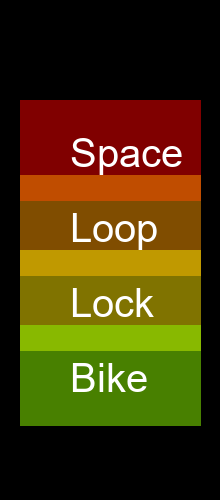

In [109]:
#create the visualization (this is the new version)

from PIL import Image, ImageDraw, ImageFont

colors = {0 : (255,255,255, 0), 1 : (255, 0, 0, 128), 2: (255, 153, 0, 128), 3 : (255, 229,0, 128), 4 : (143, 255, 0, 128)}

image = Image.new("RGB", (parking1.width_factor() * 200 + 20, 500), "black")
app = ImageDraw.Draw(image, "RGBA")

font = ImageFont.truetype("arial.ttf", 40)

x_cursor = 20
move_flag = False

for space_ob in parking1.spaces:
    y_cursor = 100
    shape = [(x_cursor, y_cursor), (x_cursor + (space_ob.width_factor() * 200) - 20, y_cursor + 100)] 
    app.rectangle(shape, fill = colors[space_ob.security])
    app.text((x_cursor + (space_ob.width_factor() * 100) - 50, y_cursor + 30), "Space", font=font)
    if len(space_ob.loops) == 0:
        x_cursor += 200 * space_ob.width_factor()
    for loop_ob in space_ob.loops:
        y_cursor = 175
        shape = [(x_cursor, y_cursor), (x_cursor + (loop_ob.width_factor() * 200) - 20, y_cursor + 100)] 
        app.rectangle(shape, fill = colors[loop_ob.security])
        app.text((x_cursor + (loop_ob.width_factor() * 100) - 50, y_cursor + 30), "Loop", font=font)
        if len(loop_ob.locks) == 0:
            x_cursor += 200 * loop_ob.width_factor()
        for lock_ob in loop_ob.locks:
            y_cursor = 250
            shape = [(x_cursor, y_cursor), (x_cursor + (lock_ob.width_factor() * 200) - 20, y_cursor + 100)] 
            app.rectangle(shape, fill = colors[lock_ob.security])
            app.text((x_cursor + (lock_ob.width_factor() * 100) - 50, y_cursor + 30), "Lock", font=font)
            if len(lock_ob.bikes) == 0:
                x_cursor += 200 * lock_ob.width_factor()
            for bike_ob in lock_ob.bikes:
                y_cursor = 325
                shape = [(x_cursor, y_cursor), (x_cursor + (bike_ob.width_factor() * 200) - 20, y_cursor + 100)] 
                app.rectangle(shape, fill = colors[bike_ob.security])
                app.text((x_cursor + (bike_ob.width_factor() * 100) - 50, y_cursor + 30), "Bike", font=font)
                x_cursor += 200 * bike_ob.width_factor()

display(image)

<h2>Save Visualization</h2>

In [110]:
image.save("generated\\image.png") #YOUR IMAGE PATH HERE